<a href="https://colab.research.google.com/github/theDreamer911/dailyChallenges/blob/master/Loan_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving nonperformanceloan.csv to nonperformanceloan.csv


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
kredit = pd.read_csv('nonperformanceloan.csv')

In [ ]:
df = kredit.copy()

In [ ]:
df.shape

(12395, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         12395 non-null  int64  
 1   outstanding                          12395 non-null  int64  
 2   limit_kredit                         12395 non-null  int64  
 3   tagihan                              12395 non-null  int64  
 4   total_pemakaian_tunai                12395 non-null  int64  
 5   total_pemakaian_retail               12395 non-null  int64  
 6   sisa_tagihan_tidak_terbayar          12395 non-null  int64  
 7   kode_cabang                          12312 non-null  object 
 8   rasio_pembayaran                     12395 non-null  float64
 9   persentasi_overlimit                 12395 non-null  float64
 10  rasio_pembayaran_3bulan              12395 non-null  float64
 11  rasio_pembayaran_6bulan     

In [ ]:
df.isnull().sum()

jumlah_kartu                            0
outstanding                             0
limit_kredit                            0
tagihan                                 0
total_pemakaian_tunai                   0
total_pemakaian_retail                  0
sisa_tagihan_tidak_terbayar             0
kode_cabang                            83
rasio_pembayaran                        0
persentasi_overlimit                    0
rasio_pembayaran_3bulan                 0
rasio_pembayaran_6bulan                 0
skor_delikuensi                         0
flag_kredit_macet                       0
jumlah_tahun_sejak_pembukaan_kredit     0
total_pemakaian                         0
sisa_tagihan_per_jumlah_kartu           0
sisa_tagihan_per_limit                  0
total_pemakaian_per_limit               0
pemakaian_3bln_per_limit                0
pemakaian_6bln_per_limit                0
utilisasi_3bulan                        0
utilisasi_6bulan                        0
dtype: int64

In [ ]:
df.rename(columns={'flag_kredit_macet':'target'}, inplace=True)

In [ ]:
df.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,target,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,12395.000000,1.239500e+04,1.239500e+04,1.239500e+04,1.239500e+04,1.239500e+04,1.239500e+04,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,1.239500e+04,1.239500e+04,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,2.503913,1.153097e+07,2.072586e+07,8.026530e+06,7.757448e+04,2.047765e+06,8.054487e+06,66.985117,3.374362,42.278478,82.554313,0.004841,0.090359,6.639355,2.125378e+06,2.940093e+06,0.468935,0.109795,0.168175,0.203453,0.571154,0.534282
std,1.019361,2.446334e+07,2.909614e+07,1.726786e+07,6.471258e+05,8.057247e+06,1.944536e+07,878.528082,9.140777,1194.858851,1359.955375,0.112086,0.286707,4.675901,8.256547e+06,6.286651e+06,0.475384,0.200393,0.192297,0.278280,0.414411,0.437496
min,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,2.000000,1.989984e+06,5.000000e+06,8.111740e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.500000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035150,0.032800,0.189000,0.155000
50%,2.000000,4.691569e+06,9.000000e+06,3.139425e+06,0.000000e+00,2.067400e+05,2.753848e+06,27.600000,0.000000,50.100000,65.700000,0.000000,0.000000,5.666667,2.547710e+05,1.213084e+06,0.332000,0.022900,0.109000,0.118000,0.574000,0.495955
75%,3.000000,1.052557e+07,2.200000e+07,7.337790e+06,0.000000e+00,1.384514e+06,7.061134e+06,100.000000,1.200000,92.850000,100.000000,0.000000,0.000000,9.330000,1.502294e+06,3.076559e+06,0.935000,0.128000,0.240000,0.286000,0.918000,0.865049
max,16.000000,7.980586e+08,1.000000e+09,4.190000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,18306.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


Mengisi kode_cabang yang kosong dengan index[0] = A

In [ ]:
df['kode_cabang'].fillna(df['kode_cabang'].value_counts().index[0], inplace=True)

In [ ]:
df.isnull().sum()

jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
target                                 0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

In [ ]:
df['kode_cabang'].unique()

array(['I', 'A', 'B', 'E', 'G', 'K', 'F', 'C', 'J', 'H', 'D'],
      dtype=object)

### Memindahkan target ke columns terakhir

In [ ]:
cols = list(df.columns)
cols.append(cols.pop(cols.index('target')))
df = df[cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         12395 non-null  int64  
 1   outstanding                          12395 non-null  int64  
 2   limit_kredit                         12395 non-null  int64  
 3   tagihan                              12395 non-null  int64  
 4   total_pemakaian_tunai                12395 non-null  int64  
 5   total_pemakaian_retail               12395 non-null  int64  
 6   sisa_tagihan_tidak_terbayar          12395 non-null  int64  
 7   kode_cabang                          12395 non-null  object 
 8   rasio_pembayaran                     12395 non-null  float64
 9   persentasi_overlimit                 12395 non-null  float64
 10  rasio_pembayaran_3bulan              12395 non-null  float64
 11  rasio_pembayaran_6bulan     

In [ ]:
df.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,target
count,12395.000000,1.239500e+04,1.239500e+04,1.239500e+04,1.239500e+04,1.239500e+04,1.239500e+04,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,1.239500e+04,1.239500e+04,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,2.503913,1.153097e+07,2.072586e+07,8.026530e+06,7.757448e+04,2.047765e+06,8.054487e+06,66.985117,3.374362,42.278478,82.554313,0.004841,6.639355,2.125378e+06,2.940093e+06,0.468935,0.109795,0.168175,0.203453,0.571154,0.534282,0.090359
std,1.019361,2.446334e+07,2.909614e+07,1.726786e+07,6.471258e+05,8.057247e+06,1.944536e+07,878.528082,9.140777,1194.858851,1359.955375,0.112086,4.675901,8.256547e+06,6.286651e+06,0.475384,0.200393,0.192297,0.278280,0.414411,0.437496,0.286707
min,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.000000,0.000000,-57792.340000,-77056.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000,0.000000
25%,2.000000,1.989984e+06,5.000000e+06,8.111740e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.500000,21.600000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035150,0.032800,0.189000,0.155000,0.000000
50%,2.000000,4.691569e+06,9.000000e+06,3.139425e+06,0.000000e+00,2.067400e+05,2.753848e+06,27.600000,0.000000,50.100000,65.700000,0.000000,5.666667,2.547710e+05,1.213084e+06,0.332000,0.022900,0.109000,0.118000,0.574000,0.495955,0.000000
75%,3.000000,1.052557e+07,2.200000e+07,7.337790e+06,0.000000e+00,1.384514e+06,7.061134e+06,100.000000,1.200000,92.850000,100.000000,0.000000,9.330000,1.502294e+06,3.076559e+06,0.935000,0.128000,0.240000,0.286000,0.918000,0.865049,0.000000
max,16.000000,7.980586e+08,1.000000e+09,4.190000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000000,190.000000,18306.000000,54899.000000,5.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000,1.000000


In [ ]:
import seaborn as sns

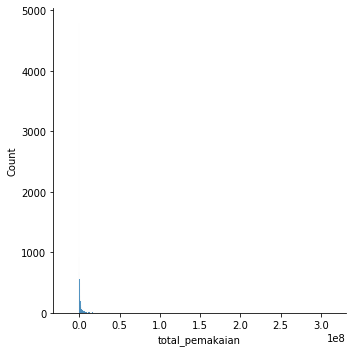

In [ ]:
sns.displot(df.total_pemakaian, kde=False)

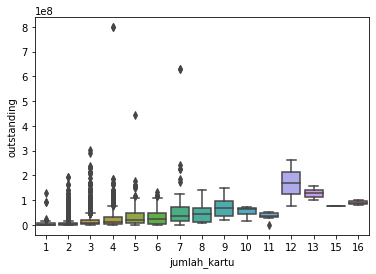

In [ ]:
sns.boxplot(x='jumlah_kartu', y='outstanding',data=df)

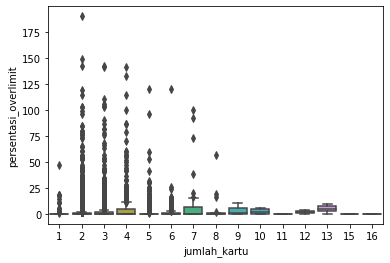

In [ ]:
sns.boxplot(x='jumlah_kartu', y='persentasi_overlimit',data=df)

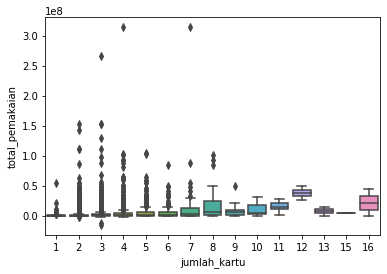

In [ ]:
sns.boxplot(x='jumlah_kartu', y='total_pemakaian',data=df)

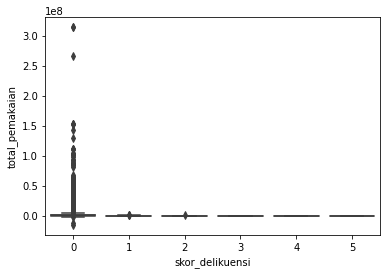

In [ ]:
sns.boxplot(x='skor_delikuensi', y='total_pemakaian',data=df)

## Data Normalization

> Ini gagal, lewati blok yang ini, lanjut ke blok 'Labeling'



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         12395 non-null  int64  
 1   outstanding                          12395 non-null  int64  
 2   limit_kredit                         12395 non-null  int64  
 3   tagihan                              12395 non-null  int64  
 4   total_pemakaian_tunai                12395 non-null  int64  
 5   total_pemakaian_retail               12395 non-null  int64  
 6   sisa_tagihan_tidak_terbayar          12395 non-null  int64  
 7   kode_cabang                          12395 non-null  object 
 8   rasio_pembayaran                     12395 non-null  float64
 9   persentasi_overlimit                 12395 non-null  float64
 10  rasio_pembayaran_3bulan              12395 non-null  float64
 11  rasio_pembayaran_6bulan     

In [ ]:
df['target'].dtype

dtype('int64')

In [ ]:
df.select_dtypes

<bound method DataFrame.select_dtypes of        jumlah_kartu  outstanding  ...  utilisasi_6bulan  target
0                 2        36158  ...          0.021949       0
1                 2       268691  ...          0.000300       0
2                 3      6769149  ...          0.267853       0
3                 2      9402085  ...          0.336571       0
4                 2      6227439  ...          0.181863       0
...             ...          ...  ...               ...     ...
12390             2      4827850  ...          0.125000       0
12391             2      2940400  ...          0.805000       1
12392             2        62162  ...          0.113000       0
12393             3       264597  ...          0.647000       0
12394             2      4067271  ...          1.050000       0

[12395 rows x 23 columns]>

In [ ]:
for column in df.dtype:
  print(column)

AttributeError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_norm

ValueError: ignored

## Labeling 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['kode_cabang'] = le.fit_transform(df['kode_cabang'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         12395 non-null  int64  
 1   outstanding                          12395 non-null  int64  
 2   limit_kredit                         12395 non-null  int64  
 3   tagihan                              12395 non-null  int64  
 4   total_pemakaian_tunai                12395 non-null  int64  
 5   total_pemakaian_retail               12395 non-null  int64  
 6   sisa_tagihan_tidak_terbayar          12395 non-null  int64  
 7   kode_cabang                          12395 non-null  int64  
 8   rasio_pembayaran                     12395 non-null  float64
 9   persentasi_overlimit                 12395 non-null  float64
 10  rasio_pembayaran_3bulan              12395 non-null  float64
 11  rasio_pembayaran_6bulan     

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_norm

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,target
0,0.066667,0.000045,0.004012,0.000008,0.0,0.052108,0.000059,0.8,0.209366,0.0,0.760426,0.584714,0.0,0.435644,0.047525,0.000089,0.000519,0.120798,0.038086,0.067613,0.001593,0.002256,0.0
1,0.066667,0.000337,0.007021,0.000560,0.0,0.052111,0.000000,0.0,0.208193,0.0,0.759443,0.583957,0.0,0.000000,0.047527,0.000000,0.000000,0.120814,0.034845,0.065561,0.000485,0.000031,0.0
2,0.133333,0.008482,0.025075,0.009881,0.0,0.052108,0.000000,0.0,0.209341,0.0,0.760757,0.584721,0.0,0.297030,0.047524,0.000000,0.000000,0.120795,0.046050,0.071057,0.030657,0.027529,0.0
3,0.066667,0.011781,0.007021,0.014510,0.0,0.060977,0.013405,0.0,0.209295,0.0,0.760724,0.584713,0.0,0.027228,0.055613,0.020108,0.082208,0.171761,0.124178,0.080673,0.087082,0.034591,0.0
4,0.066667,0.007803,0.077232,0.004920,0.0,0.064382,0.010391,0.0,0.208193,0.0,0.759817,0.584275,0.0,0.282178,0.058718,0.015586,0.007965,0.129612,0.039597,0.079100,0.004760,0.018691,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12390,0.066667,0.006049,0.046138,0.003205,0.0,0.058022,0.000000,0.0,0.209333,0.0,0.760849,0.584586,0.0,0.061782,0.052918,0.000000,0.000000,0.127733,0.049585,0.070331,0.013379,0.012847,0.0
12391,0.066667,0.003684,0.000000,0.006801,0.0,0.052108,0.006496,0.0,0.208326,0.0,0.759554,0.584041,0.0,0.027327,0.047524,0.009744,0.132735,0.120795,0.065819,0.065561,0.109375,0.082734,1.0
12392,0.066667,0.000078,0.003009,0.000050,0.0,0.052109,0.000000,0.0,0.209341,0.0,0.760757,0.584965,0.0,0.037129,0.047525,0.000000,0.000000,0.120803,0.034845,0.104275,0.001244,0.011614,0.0
12393,0.133333,0.000332,0.001003,0.000556,0.0,0.052111,0.000555,0.8,0.209364,0.0,0.760263,0.584008,0.0,0.091485,0.047527,0.000555,0.008508,0.120844,0.034845,0.096440,0.040209,0.066495,0.0


In [ ]:
df_norm['kode_cabang'].unique()

array([0.8, 0. , 0.1, 0.4, 0.6, 1. , 0.5, 0.2, 0.9, 0.7, 0.3])

In [ ]:
df_norm.isnull().sum()

jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
target                                 0
dtype: int64

In [ ]:
df_norm.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,target
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,0.100261,0.014449,0.017779,0.019109,0.002690,0.058919,0.018141,0.211747,0.208962,0.017760,0.759998,0.584582,0.000968,0.174931,0.053971,0.019865,0.064770,0.141780,0.081354,0.089003,0.070257,0.054911,0.090359
std,0.067957,0.030654,0.029184,0.041214,0.022438,0.026798,0.043796,0.299269,0.010084,0.048109,0.015702,0.010306,0.022417,0.138888,0.025045,0.042477,0.065661,0.038301,0.053180,0.032064,0.051002,0.044964,0.286707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.002494,0.002006,0.001888,0.000000,0.052108,0.000000,0.000000,0.208193,0.000000,0.759712,0.584120,0.000000,0.064455,0.047524,0.000000,0.000000,0.120795,0.044566,0.069340,0.023225,0.015930,0.000000
50%,0.066667,0.005879,0.006018,0.007445,0.000000,0.052796,0.006202,0.000000,0.208510,0.000000,0.760101,0.584455,0.000000,0.146040,0.048297,0.008197,0.045856,0.125172,0.064989,0.079157,0.070607,0.050972,0.000000
75%,0.133333,0.013189,0.019057,0.017466,0.000000,0.056713,0.015903,0.500000,0.209341,0.006316,0.760663,0.584714,0.000000,0.254851,0.052081,0.020788,0.129144,0.145260,0.101217,0.098514,0.112944,0.088905,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(12395, 23)

## Penyederhanaan Nama

In [ ]:
df_norm.rename(columns={'jumlah_tahun_sejak_pembukaan_kredit':'tahun_buka',
                        'rasio_pembayaran_3bulan':'bayar_3',
                        'rasio_pembayaran_6bulan':'bayar_6',
                        'pemakaian_3bln_per_limit':'pakai_3',
                        'pemakaian_6bln_per_limit':'pakai_6',
                        'utilisasi_3bulan':'util_3',
                        'utilisasi_6bulan':'util_6'
                        }, inplace=True)

### Update df_norm yang terbaru

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jumlah_kartu                   12395 non-null  float64
 1   outstanding                    12395 non-null  float64
 2   limit_kredit                   12395 non-null  float64
 3   tagihan                        12395 non-null  float64
 4   total_pemakaian_tunai          12395 non-null  float64
 5   total_pemakaian_retail         12395 non-null  float64
 6   sisa_tagihan_tidak_terbayar    12395 non-null  float64
 7   kode_cabang                    12395 non-null  float64
 8   rasio_pembayaran               12395 non-null  float64
 9   persentasi_overlimit           12395 non-null  float64
 10  bayar_3                        12395 non-null  float64
 11  bayar_6                        12395 non-null  float64
 12  skor_delikuensi                12395 non-null 

### Plot tabel sns

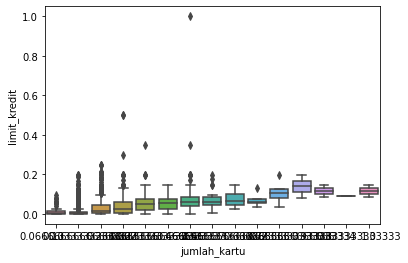

In [ ]:
sns.boxplot(x='jumlah_kartu', y='limit_kredit',data=df_norm)

## EDA - Kontinue

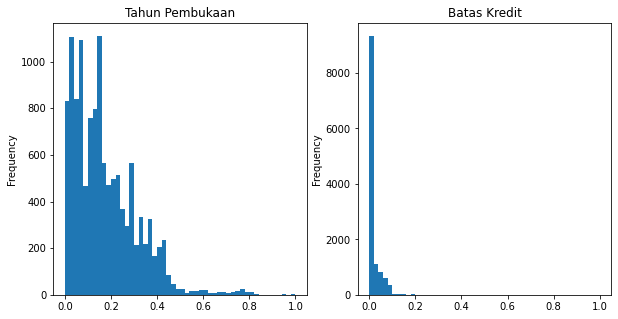

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df_norm['tahun_buka'].plot.hist(bins=50, title='Tahun Pembukaan')
plt.subplot(122)
df_norm['limit_kredit'].plot.hist(bins=50, title="Batas Kredit")
plt.show()

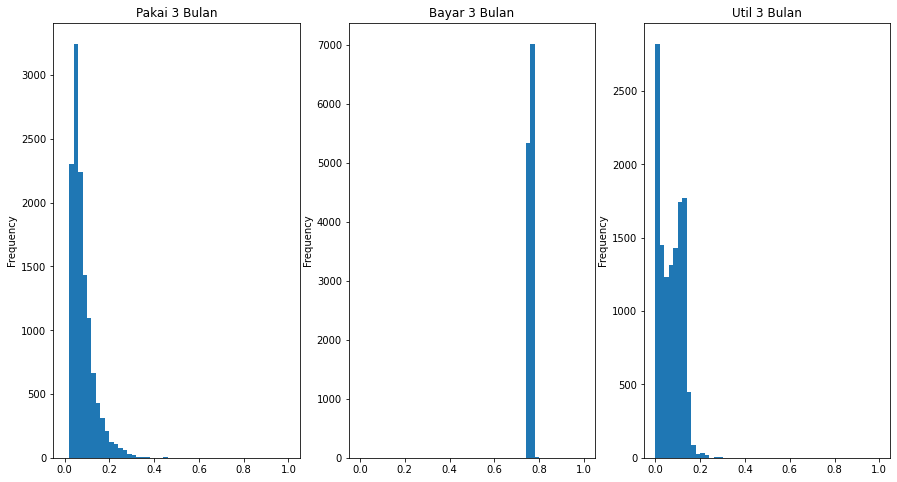

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(131)
df_norm['pakai_3'].plot.hist(bins=50, title='Pakai 3 Bulan')
plt.subplot(132)
df_norm['bayar_3'].plot.hist(bins=50, title='Bayar 3 Bulan')
plt.subplot(133)
df_norm['util_3'].plot.hist(bins=50, title='Util 3 Bulan')
plt.show()

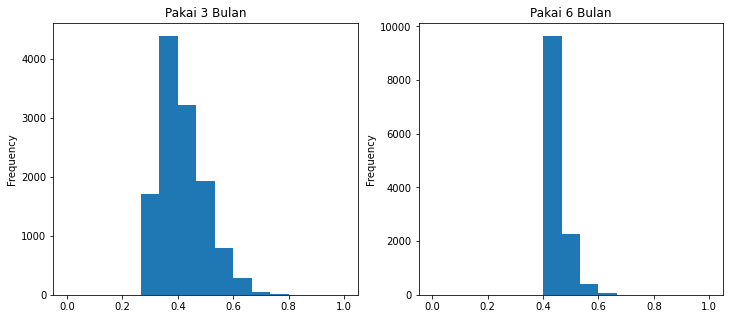

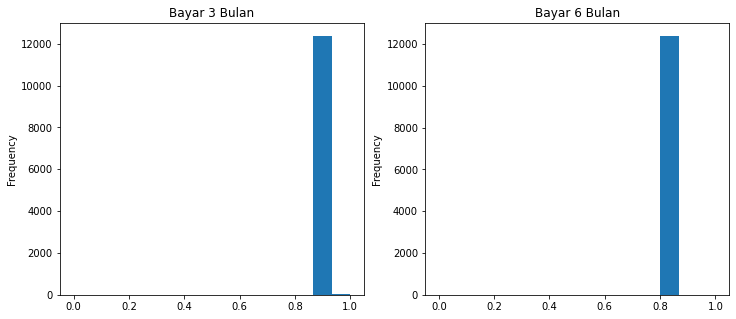

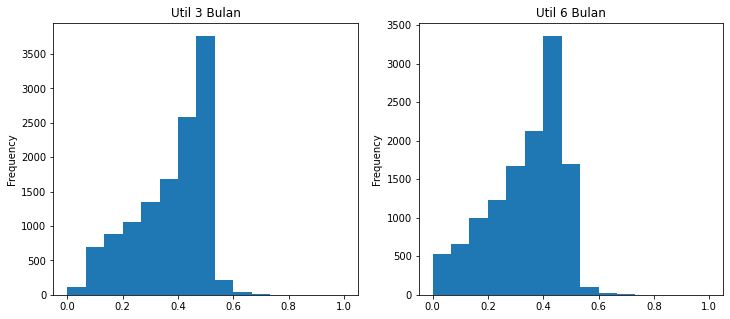

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_norm['pakai_3'].apply(np.cbrt).plot.hist(bins=15, title='Pakai 3 Bulan')
plt.subplot(122)
df_norm['pakai_6'].apply(np.cbrt).plot.hist(bins=15, title='Pakai 6 Bulan')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
df_norm['bayar_3'].apply(np.cbrt).plot.hist(bins=15, title='Bayar 3 Bulan')
plt.subplot(122)
df_norm['bayar_6'].apply(np.cbrt).plot.hist(bins=15, title='Bayar 6 Bulan')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
df_norm['util_3'].apply(np.cbrt).plot.hist(bins=15, title='Util 3 Bulan')
plt.subplot(122)
df_norm['util_6'].apply(np.cbrt).plot.hist(bins=15, title='Util 6 Bulan')
plt.show()

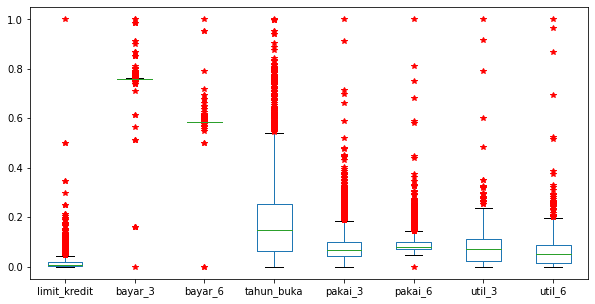

In [ ]:
numvar_list = ['tahun_buka', 'limit_kredit', 'pakai_3', 'pakai_6', 'bayar_3', 'bayar_6', 'util_3', 'util_6']
dfnum = df_norm[df_norm.columns[df_norm.columns.isin(numvar_list)]]
plt.figure(figsize=(10,5))
dfnum.boxplot(sym='r*', grid=False)
plt.show()

## Multivar Exploratory

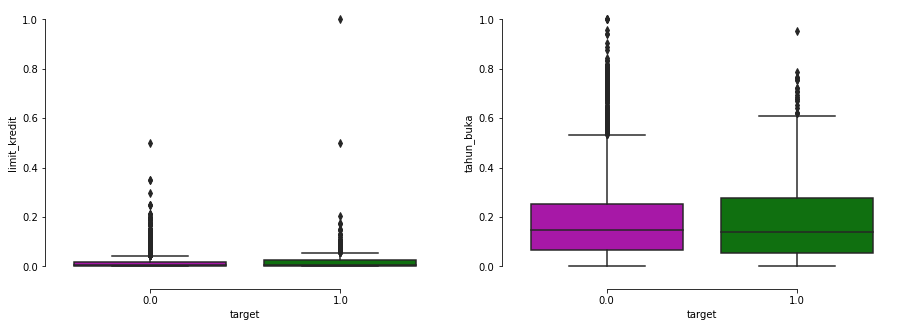

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,5))
plt.subplot(121)

sns.boxplot(x='target', y='limit_kredit',
            palette=['m', 'g'],
            data=df_norm)
sns.despine(offset=10, trim=True)


plt.subplot(122)

sns.boxplot(x='target', y='tahun_buka',
            palette=['m', 'g'],
            data=df_norm)
sns.despine(offset=10, trim=True)

plt.show()

## EDA Kategorik

In [ ]:
df_norm.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,bayar_3,bayar_6,skor_delikuensi,tahun_buka,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pakai_3,pakai_6,util_3,util_6,target
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,0.100261,0.014449,0.017779,0.019109,0.002690,0.058919,0.018141,0.211747,0.208962,0.017760,0.759998,0.584582,0.000968,0.174931,0.053971,0.019865,0.064770,0.141780,0.081354,0.089003,0.070257,0.054911,0.090359
std,0.067957,0.030654,0.029184,0.041214,0.022438,0.026798,0.043796,0.299269,0.010084,0.048109,0.015702,0.010306,0.022417,0.138888,0.025045,0.042477,0.065661,0.038301,0.053180,0.032064,0.051002,0.044964,0.286707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.002494,0.002006,0.001888,0.000000,0.052108,0.000000,0.000000,0.208193,0.000000,0.759712,0.584120,0.000000,0.064455,0.047524,0.000000,0.000000,0.120795,0.044566,0.069340,0.023225,0.015930,0.000000
50%,0.066667,0.005879,0.006018,0.007445,0.000000,0.052796,0.006202,0.000000,0.208510,0.000000,0.760101,0.584455,0.000000,0.146040,0.048297,0.008197,0.045856,0.125172,0.064989,0.079157,0.070607,0.050972,0.000000
75%,0.133333,0.013189,0.019057,0.017466,0.000000,0.056713,0.015903,0.500000,0.209341,0.006316,0.760663,0.584714,0.000000,0.254851,0.052081,0.020788,0.129144,0.145260,0.101217,0.098514,0.112944,0.088905,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


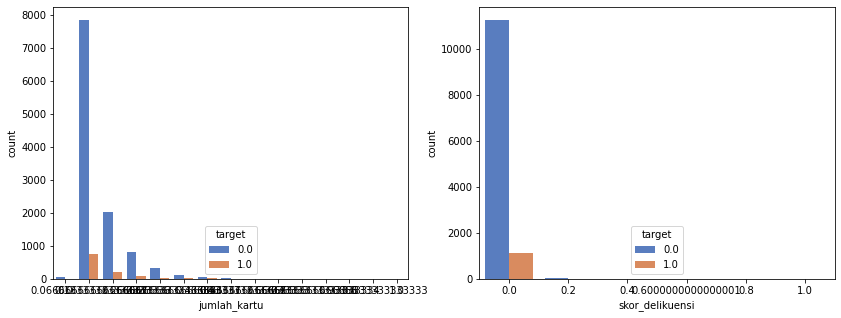

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.countplot(x='jumlah_kartu', data=df_norm, hue='target', palette='muted')
plt.subplot(122)
sns.countplot(x='skor_delikuensi', data=df_norm, hue='target', palette='muted')

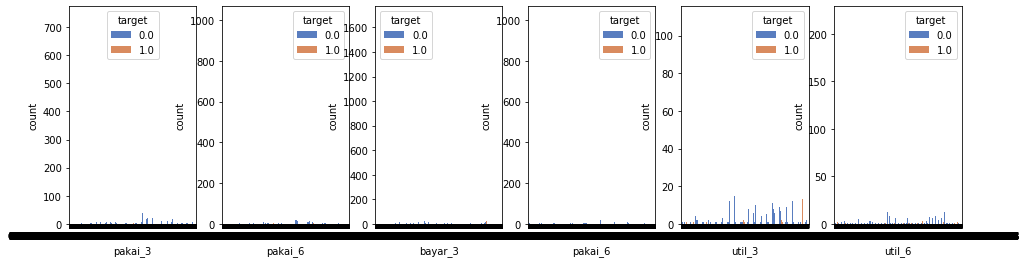

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(161)
sns.countplot(x='pakai_3', data=df_norm, hue='target', palette='muted')

plt.subplot(162)
sns.countplot(x='pakai_6', data=df_norm, hue='target', palette='muted')

plt.subplot(163)
sns.countplot(x='bayar_3', data=df_norm, hue='target', palette='muted')

plt.subplot(164)
sns.countplot(x='pakai_6', data=df_norm, hue='target', palette='muted')

plt.subplot(165)
sns.countplot(x='util_3', data=df_norm, hue='target', palette='muted')

plt.subplot(166)
sns.countplot(x='util_6', data=df_norm, hue='target', palette='muted')

## Feature Engineering

In [ ]:
X = df_norm.drop(['target'],axis=1)
Y = df_norm['target']

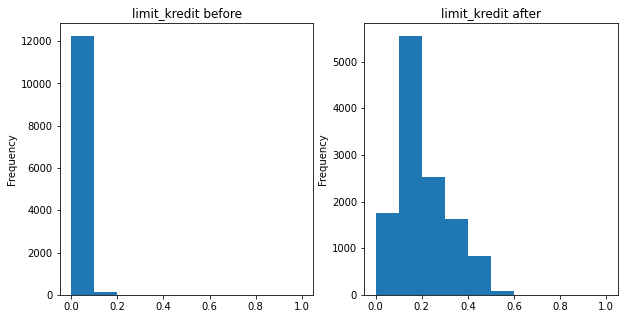

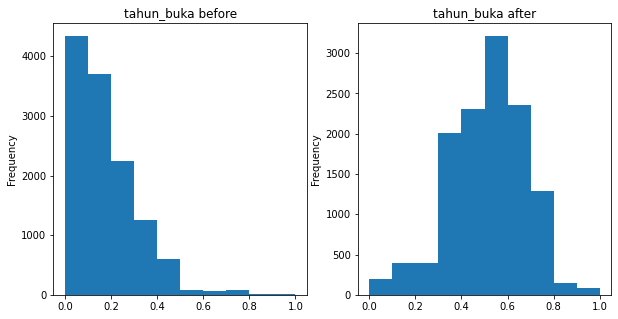

In [ ]:
X['limit_kredit'] = np.cbrt(df_norm.limit_kredit)
X['tahun_buka'] = np.cbrt(df_norm['tahun_buka'])

plt.figure(figsize=(10,5))
plt.subplot(121)
df_norm['limit_kredit'].plot.hist(bins=10, title='limit_kredit before')
plt.subplot(122)
X['limit_kredit'].plot.hist(bins=10, title='limit_kredit after')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
df_norm['tahun_buka'].plot.hist(bins=10, title='tahun_buka before')
plt.subplot(122)
X['tahun_buka'].plot.hist(bins=10, title='tahun_buka after')
plt.show()

In [ ]:
# Transform cbrt
X['pakai_3'] = np.cbrt(df_norm['pakai_3'])
X['pakai_6'] = np.cbrt(df_norm['pakai_6'])
X['bayar_3'] = np.cbrt(df_norm['bayar_3'])
X['bayar_6'] = np.cbrt(df_norm['bayar_6'])
X['util_3'] = np.cbrt(df_norm['util_3'])
X['util_6'] = np.cbrt(df_norm['util_6'])

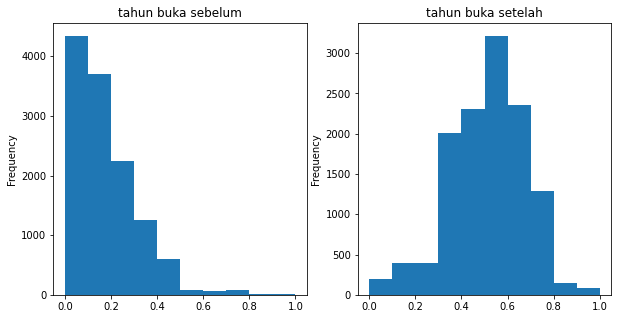

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df_norm['tahun_buka'].plot.hist(bins=10, title='tahun buka sebelum')
plt.subplot(122)
X['tahun_buka'].plot.hist(bins=10, title='tahun buka setelah')
plt.show()

In [ ]:
X.jumlah_kartu.value_counts()

0.066667    8614
0.133333    2220
0.200000     894
0.266667     354
0.333333     126
0.000000      67
0.400000      64
0.466667      25
0.533333      12
0.600000       6
0.666667       6
0.800000       2
0.733333       2
1.000000       2
0.933333       1
Name: jumlah_kartu, dtype: int64

In [ ]:
fill = (X.jumlah_kartu >= 0.1)
fills = (X.jumlah_kartu <= 0.1)

X.loc[fill,'jumlah_kartu']=0.133333
X.loc[fills,'jumlah_kartu']=0.066667

X.jumlah_kartu.value_counts()

0.066667    8681
0.133333    3714
Name: jumlah_kartu, dtype: int64

In [ ]:
X.skor_delikuensi.value_counts()

0.0    12360
0.2       24
0.4        4
0.8        3
0.6        2
1.0        2
Name: skor_delikuensi, dtype: int64

## OneHot Encoding

In [ ]:
X['jumlah_kartu'] = X['jumlah_kartu'].astype('category')
X['skor_delikuensi'] = X['skor_delikuensi'].astype('category')

X = pd.concat([pd.get_dummies(X['jumlah_kartu'], prefix='jumlah_kartu'),
               pd.get_dummies(X['skor_delikuensi'], prefix='skor_delikuensi'),
               X], axis=1)

X.drop(['jumlah_kartu'], axis=1, inplace=True)
X.drop(['skor_delikuensi'], axis=1, inplace=True)
X.head()

,jumlah_kartu_0.066667,jumlah_kartu_0.133333,skor_delikuensi_0.0,skor_delikuensi_0.2,skor_delikuensi_0.4,skor_delikuensi_0.6000000000000001,skor_delikuensi_0.8,skor_delikuensi_1.0,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,bayar_3,bayar_6,tahun_buka,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pakai_3,pakai_6,util_3,util_6
0,1,0,1,0,0,0,0,0,0.000045,0.158899,0.000008,0.0,0.052108,0.000059,0.8,0.209366,0.0,0.912751,0.836209,0.758072,0.047525,0.000089,0.000519,0.120798,0.336451,0.407389,0.116779,0.131150
1,1,0,1,0,0,0,0,0,0.000337,0.191485,0.000560,0.0,0.052111,0.000000,0.0,0.208193,0.0,0.912357,0.835847,0.000000,0.047527,0.000000,0.000000,0.120814,0.326623,0.403225,0.078587,0.031357
2,0,1,1,0,0,0,0,0,0.008482,0.292695,0.009881,0.0,0.052108,0.000000,0.0,0.209341,0.0,0.912883,0.836212,0.667216,0.047524,0.000000,0.000000,0.120795,0.358435,0.414192,0.312976,0.301945
3,1,0,1,0,0,0,0,0,0.011781,0.191485,0.014510,0.0,0.060977,0.013405,0.0,0.209295,0.0,0.912870,0.836208,0.300841,0.055613,0.020108,0.082208,0.171761,0.498901,0.432092,0.443244,0.325828
4,1,0,1,0,0,0,0,0,0.007803,0.425858,0.004920,0.0,0.064382,0.010391,0.0,0.208193,0.0,0.912507,0.835999,0.655905,0.058718,0.015586,0.007965,0.129612,0.340844,0.429266,0.168215,0.265386


In [ ]:
fill = (X.jumlah_kartu_0.066667)

In [ ]:
X["jumlah_kartu_0.066667"].value_counts()

1    8681
0    3714
Name: jumlah_kartu_0.066667, dtype: int64

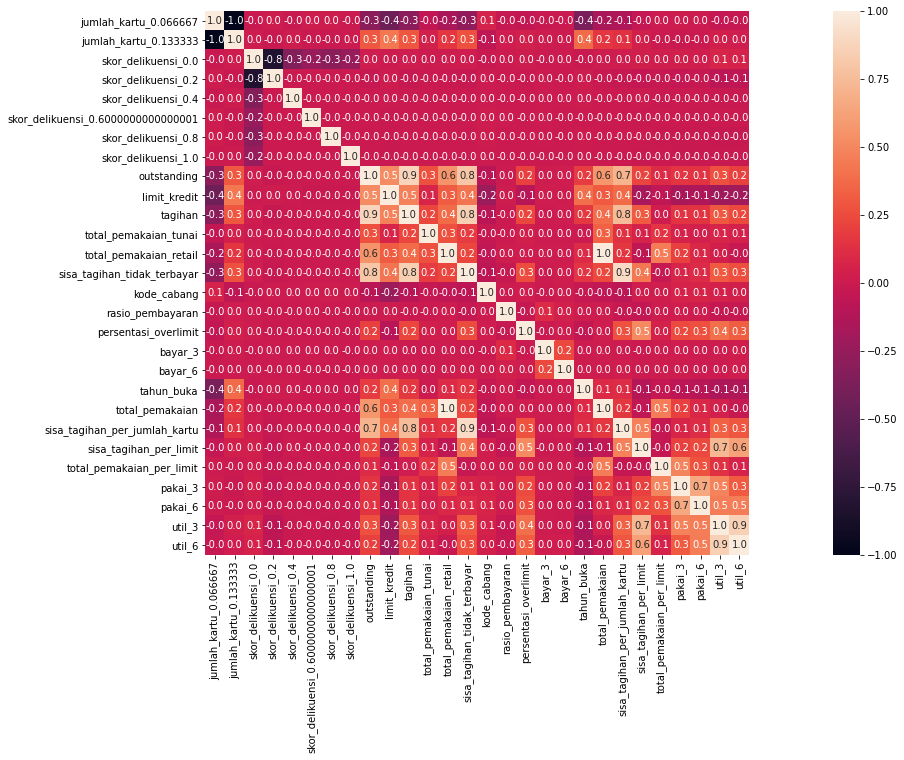

In [ ]:
correlation = X.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f")

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df_norm.shape

(12395, 23)

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12395 entries, 0 to 12394
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jumlah_kartu                   12395 non-null  float64
 1   outstanding                    12395 non-null  float64
 2   limit_kredit                   12395 non-null  float64
 3   tagihan                        12395 non-null  float64
 4   total_pemakaian_tunai          12395 non-null  float64
 5   total_pemakaian_retail         12395 non-null  float64
 6   sisa_tagihan_tidak_terbayar    12395 non-null  float64
 7   kode_cabang                    12395 non-null  float64
 8   rasio_pembayaran               12395 non-null  float64
 9   persentasi_overlimit           12395 non-null  float64
 10  bayar_3                        12395 non-null  float64
 11  bayar_6                        12395 non-null  float64
 12  skor_delikuensi                12395 non-null 

In [ ]:
# raw data
array = df_norm.values
X_raw = array[:,1:22]
Y_raw = array[:, 22]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw, test_size=0.2,
                                                    random_state = 111)

# Cek Shape
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")

X_train: (9916, 21)
X_test: (2479, 21)
Y_train: (9916,)
Y_test: (2479,)


In [ ]:
a = Y_train.sum()
b = Y_test.sum()

print("train:", (a/len(Y_train))*100)
print("test:", (a/len(Y_test))*100)

train: 9.308188785800727
test: 37.23275514320291


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#%% Linear Regression
logreg = LogisticRegression(random_state = 123)
results = cross_val_score(logreg, X_train, Y_train, cv=10)
results.mean()

0.9064140775039876

In [ ]:
#%% Decision Tree
dtree = DecisionTreeClassifier(random_state = 123)
results = cross_val_score(dtree, X_train, Y_train, cv=10)
results.mean()

0.8645638366264119

In [ ]:
log = logreg.fit(X_train, Y_train)
lrpred = log.predict(X_test)
confumat = confusion_matrix(Y_test, lrpred)
print(confumat)
report = classification_report(Y_test, lrpred)
print(report)

[[2280    2]
 [ 197    0]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2282
         1.0       0.00      0.00      0.00       197

    accuracy                           0.92      2479
   macro avg       0.46      0.50      0.48      2479
weighted avg       0.85      0.92      0.88      2479



In [ ]:
dtree.fit(X_train, Y_train)
dtpred = dtree.predict(X_test)
confumat = confusion_matrix(Y_test, dtpred)
print(confumat)
report = classification_report(Y_test, dtpred)
print(report)

[[2089  193]
 [ 126   71]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2282
         1.0       0.27      0.36      0.31       197

    accuracy                           0.87      2479
   macro avg       0.61      0.64      0.62      2479
weighted avg       0.89      0.87      0.88      2479



## Modeling with FE

In [ ]:
X.head()

,jumlah_kartu_0.066667,jumlah_kartu_0.133333,skor_delikuensi_0.0,skor_delikuensi_0.2,skor_delikuensi_0.4,skor_delikuensi_0.6000000000000001,skor_delikuensi_0.8,skor_delikuensi_1.0,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,bayar_3,bayar_6,tahun_buka,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pakai_3,pakai_6,util_3,util_6
0,1,0,1,0,0,0,0,0,0.000045,0.158899,0.000008,0.0,0.052108,0.000059,0.8,0.209366,0.0,0.912751,0.836209,0.758072,0.047525,0.000089,0.000519,0.120798,0.336451,0.407389,0.116779,0.131150
1,1,0,1,0,0,0,0,0,0.000337,0.191485,0.000560,0.0,0.052111,0.000000,0.0,0.208193,0.0,0.912357,0.835847,0.000000,0.047527,0.000000,0.000000,0.120814,0.326623,0.403225,0.078587,0.031357
2,0,1,1,0,0,0,0,0,0.008482,0.292695,0.009881,0.0,0.052108,0.000000,0.0,0.209341,0.0,0.912883,0.836212,0.667216,0.047524,0.000000,0.000000,0.120795,0.358435,0.414192,0.312976,0.301945
3,1,0,1,0,0,0,0,0,0.011781,0.191485,0.014510,0.0,0.060977,0.013405,0.0,0.209295,0.0,0.912870,0.836208,0.300841,0.055613,0.020108,0.082208,0.171761,0.498901,0.432092,0.443244,0.325828
4,1,0,1,0,0,0,0,0,0.007803,0.425858,0.004920,0.0,0.064382,0.010391,0.0,0.208193,0.0,0.912507,0.835999,0.655905,0.058718,0.015586,0.007965,0.129612,0.340844,0.429266,0.168215,0.265386


In [ ]:
X = X.drop(['jumlah_kartu_0.133333', 'skor_delikuensi_1.0'],1)

In [ ]:
X.head()

,jumlah_kartu_0.066667,skor_delikuensi_0.0,skor_delikuensi_0.2,skor_delikuensi_0.4,skor_delikuensi_0.6000000000000001,skor_delikuensi_0.8,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,bayar_3,bayar_6,tahun_buka,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pakai_3,pakai_6,util_3,util_6
0,1,1,0,0,0,0,0.000045,0.158899,0.000008,0.0,0.052108,0.000059,0.8,0.209366,0.0,0.912751,0.836209,0.758072,0.047525,0.000089,0.000519,0.120798,0.336451,0.407389,0.116779,0.131150
1,1,1,0,0,0,0,0.000337,0.191485,0.000560,0.0,0.052111,0.000000,0.0,0.208193,0.0,0.912357,0.835847,0.000000,0.047527,0.000000,0.000000,0.120814,0.326623,0.403225,0.078587,0.031357
2,0,1,0,0,0,0,0.008482,0.292695,0.009881,0.0,0.052108,0.000000,0.0,0.209341,0.0,0.912883,0.836212,0.667216,0.047524,0.000000,0.000000,0.120795,0.358435,0.414192,0.312976,0.301945
3,1,1,0,0,0,0,0.011781,0.191485,0.014510,0.0,0.060977,0.013405,0.0,0.209295,0.0,0.912870,0.836208,0.300841,0.055613,0.020108,0.082208,0.171761,0.498901,0.432092,0.443244,0.325828
4,1,1,0,0,0,0,0.007803,0.425858,0.004920,0.0,0.064382,0.010391,0.0,0.208193,0.0,0.912507,0.835999,0.655905,0.058718,0.015586,0.007965,0.129612,0.340844,0.429266,0.168215,0.265386


In [ ]:
X.shape

(12395, 26)

In [ ]:
X_fe = X.values
Y_fe = Y

In [ ]:
# Data splitting
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_fe, Y_fe, test_size=0.2,
                                                    random_state = 111)

# Cek Shape
print(f"X_train: {X_train_.shape}")
print(f"X_test: {X_test_.shape}")
print(f"Y_train: {Y_train_.shape}")
print(f"Y_test: {Y_test_.shape}")

X_train: (9916, 26)
X_test: (2479, 26)
Y_train: (9916,)
Y_test: (2479,)


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logreg = LogisticRegression(random_state = 123)
results = cross_val_score(logreg, X_train_, Y_train_, cv=10)
results.mean()

0.9062124646007617

In [ ]:
logreg.fit(X_train_, Y_train_)
confumat = confusion_matrix(Y_test_, logreg.predict(X_test_))
print(confumat)
report = classification_report(Y_test_, logreg.predict(X_test_))
print(report)

[[2280    2]
 [ 197    0]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2282
         1.0       0.00      0.00      0.00       197

    accuracy                           0.92      2479
   macro avg       0.46      0.50      0.48      2479
weighted avg       0.85      0.92      0.88      2479



## Decision Tree With FE

In [ ]:
X_train_.shape, Y_train_.shape

((9916, 26), (9916,))

In [ ]:
dtree = DecisionTreeClassifier(random_state=123)
results = cross_val_score(dtree, X_train_, Y_train_, cv=10)
results.mean()

0.8631503084209499

In [ ]:
dtree.fit(X_train_, Y_train_)
dtpred = dtree.predict(X_test_)
confumat = confusion_matrix(Y_test_, dtpred)
print(confumat)
report = classification_report(Y_test_, dtpred)
print(report)

[[2097  185]
 [ 127   70]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2282
         1.0       0.27      0.36      0.31       197

    accuracy                           0.87      2479
   macro avg       0.61      0.64      0.62      2479
weighted avg       0.89      0.87      0.88      2479

